# Machine Learning with Python

## HSE, 2024 - 25

# Seminar 3. Linear Algebra


## Section 1. Working with Matrices


Before moving on to more meaningful topics, let's review and practice what such mathematical objects as matrices and vectors are, and how to work with these objects in Python.

In [1]:
# Let's import all the libraries we will need today.
import os

import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
# Let's configure the visualization libraries.
%matplotlib inline

sns.set(font_scale=1.3)

red   = '#FF3300'
blue  = '#0099CC'
green = '#00CC66'


Let's review how to work with matrices and vectors in Numpy!

In [3]:
#Let's create two 2x2 matrices, one 2x3 matrix, two vectors of length 2, and one vector of length 3 with random numbers using numpy.

A = np.array([[1,2],
              [3,-4]])
B = np.array([[2, 0],
              [0, 1]])
C = np.array([[1, -2, 0],
              [3, 0, -1]])

x = np.array([1, -1])
y = np.array([2, 1])
z = np.array([1, 4, 2])

### Matrix and Vector Multiplication

Matrix and vector multiplication is one of the key operations in linear algebra. Try practicing multiplication on a sheet of paper before moving to the code below.

Together, let's accomplish:

1. Element-wise multiplication of matrices A and B
2. Mathematical multiplication of matrix A by B
3. Mathematical multiplication of matrix A by C
4. Mathematical multiplication of matrix C by A
5. Multiplication of matrix A by vector x from the right and left mathematically
6. Multiplication of matrix C by vector z from the right and left mathematically
7. Dot product of vectors x and y

Let's calculate the result of element-wise multiplication of matrices A and B (`*`).

In [4]:
A * B

array([[ 2,  0],
       [ 0, -4]])

Let's calculate what we get when we perform matrix multiplication of A and B (with @ or np.dot).

In [5]:
A @ B

array([[ 2,  2],
       [ 6, -4]])

Let's calculate what we get when we perform matrix multiplication of A and C (with @ or np.dot).

In [6]:
A @ C

array([[ 7, -2, -2],
       [-9, -6,  4]])

Can we multiply matrix C by matrix A?

In [7]:
C @ A

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

Multiply matrix A by vector x from the right and left mathematically (with @ or np.dot).


In [8]:
A @ x

array([-1,  7])

In [9]:
x @ A

array([-2,  6])

Multiply matrix C by vector z from the right mathematically (with @ or np.dot).

In [10]:
C @ z

array([-7,  1])

Can we perform the multiplication from the left?

In [11]:
z @ C

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

Multiply vector x and y mathematically.

In [12]:
x @ y

1

If you feel like multiplying something else, we can practice some more :).

### Useful Matrices

Sometimes in data analysis, there is a need to use special matrices.








Identity Matrix  (`np.eye`)

In [13]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

Matrix of ones (`np.ones`). By the way, let's not confuse it with the previous one, okay?


In [14]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Matrix of zeros (`np.zeros`)

In [15]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Diagonal matrix (`np.diag`)

In [16]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

### Useful Functions

And of course, let's remember the important functions and operations with matrices that we will need in our further work (especially when talking about matrix decompositions).

#### Self-study tasks (matrix functions)

Implement the following operations with matrices, using the numpy library:

1. Calculate the determinants of matrices A and B. What about matrix C?

2. Find the eigenvalues and eigenvectors for matrices A and B. What about matrix C?

3.
Compute the inverse matrix for matrices A and B. What about matrix C? Verify that the matrices found are indeed the inverses of the original ones.

In [17]:
A = np.array([[1,2],
              [3,-4]])
B = np.array([[2, 0],
              [0, 1]])

In [18]:
np.linalg.det(A)

-10.000000000000002

In [19]:
np.linalg.det(B)

2.0

**Solution:**

Determinant [Applied to matrices A and B] (`np.linalg.det`)

In [20]:
np.linalg.det(A)

-10.000000000000002

In [21]:
np.linalg.det(B)

2.0

What if applied to matrix C:

In [22]:
np.linalg.det(C)

LinAlgError: Last 2 dimensions of the array must be square

Eigenvalues and eigenvectors [Applied to matrices B] (`np.linalg.eig`)

In [23]:
np.linalg.eig(B)

(array([2., 1.]),
 array([[1., 0.],
        [0., 1.]]))

Can it be applied to matrix C?

In [24]:
np.linalg.eig(C)

LinAlgError: Last 2 dimensions of the array must be square

Inverse matrix [Applied to matrices A and B] (`np.linalg.inv`)

In [25]:
np.linalg.inv(A)

array([[ 0.4,  0.2],
       [ 0.3, -0.1]])

In [26]:
np.linalg.inv(B)

array([[0.5, 0. ],
       [0. , 1. ]])

Let's check that it is indeed the inverse. How can we do that?

In [27]:
np.linalg.inv(A) @ A

array([[1.00000000e+00, 2.22044605e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [28]:
np.linalg.inv(B) @ B

array([[1., 0.],
       [0., 1.]])

As for matrix C?

In [29]:
np.linalg.inv(C)

LinAlgError: Last 2 dimensions of the array must be square

## Section 2. SVD

To work with SVD decomposition, let's use its implementation in scipy on the example of a generated dataset.

In [30]:
#Generate a matrix of size 100 by 10 from the normal distribution using the normal function from the random module.
X = np.random.normal(size=(100, 10))
print(X.shape)

(100, 10)


In [31]:
X

array([[ 3.77293282e-03, -1.32155794e+00, -8.07100405e-01,
        -1.33714180e+00,  7.90478260e-01, -5.20133629e-01,
         1.62344659e+00, -5.75136833e-01,  1.53847077e-01,
         5.57673359e-01],
       [-4.05153685e-01, -8.73207242e-01,  3.93375061e-01,
        -1.58052800e+00,  6.21500494e-01, -5.29434375e-01,
         1.96205010e-01,  2.76765051e-01, -4.36628292e-01,
         1.36428879e+00],
       [-1.91591366e+00,  1.09858093e+00,  9.35726507e-01,
        -6.26566305e-03,  6.51284736e-02, -6.21467932e-01,
         8.74509331e-01,  9.96962442e-01, -2.67851523e+00,
         4.69026802e-01],
       [-2.67495526e-01,  4.88432925e-01, -1.02529216e+00,
        -3.64644114e-01,  2.34390903e+00,  1.24212152e+00,
        -1.73447537e+00, -5.01452382e-01,  2.49708404e-01,
        -5.19264487e-01],
       [-9.42949174e-02,  2.11335056e-01, -9.44726942e-01,
        -1.26068440e+00,  4.30224943e-01, -8.76952954e-01,
         1.12873354e+00, -9.05287118e-01, -1.17661099e+00,
        -4.

Let's use the `svd` function of the `linalg` module from the `scipy` library to obtain the SVD decomposition of our matrix X

In [32]:
U, D, V = sp.linalg.svd(X, full_matrices=False)
print(U.shape, D.shape, V.shape)

(100, 10) (10,) (10, 10)


In [33]:
U

array([[-3.46295261e-02,  2.76922878e-02, -1.54745874e-01,
        -5.25950003e-02,  1.54856958e-01,  2.72718411e-02,
        -1.38905486e-01,  2.52159868e-02, -4.09477306e-02,
        -3.77639010e-02],
       [-1.19001898e-02, -7.88134600e-02, -8.96702726e-02,
        -1.39398900e-02,  1.40907867e-01, -6.10275632e-02,
        -7.90494178e-02, -2.72084143e-02,  1.25248692e-01,
        -7.05705948e-02],
       [-1.03748266e-01, -1.09742169e-01,  6.16100492e-02,
         5.92155034e-02,  1.97116131e-01,  6.27963295e-02,
         2.27728697e-01, -3.06580787e-02,  1.09401781e-01,
        -8.28087594e-02],
       [ 7.74024154e-02, -1.01561529e-01,  1.13371600e-01,
         9.16057267e-02, -4.18481998e-02,  1.39339234e-01,
        -2.17173886e-01,  5.94758190e-02, -2.15901869e-02,
         2.15654240e-02],
       [-1.17536435e-01,  5.42057881e-03, -9.00130075e-03,
        -6.54427684e-02,  1.27090363e-01,  1.12521908e-01,
        -7.98090408e-02, -6.81694128e-02, -5.27103484e-02,
        -3.

Let's see how the D matrix looks like

In [34]:
D

array([13.22592953, 12.01359689, 11.17898659, 10.74051073, 10.3783574 ,
       10.03712947,  9.81472662,  8.71854172,  8.10148058,  7.26532929])

In [35]:
V

array([[ 0.0266216 , -0.32328501, -0.14210403,  0.09272139, -0.0920429 ,
         0.82193452, -0.26185163,  0.18624029,  0.1438451 ,  0.24082337],
       [-0.11109908,  0.08235208, -0.03466065, -0.1061977 , -0.53010264,
         0.18483952,  0.4495814 , -0.26313571,  0.53145167, -0.31530405],
       [-0.12573401,  0.5168352 ,  0.27210316,  0.06384378, -0.04573196,
         0.34505123, -0.38824612, -0.48128374, -0.2875876 , -0.2296273 ],
       [-0.35320793,  0.60988018, -0.03674028,  0.12006864,  0.34871941,
         0.06815413,  0.06761599,  0.32321092,  0.43209252,  0.25599339],
       [-0.46761831, -0.09659607, -0.02425187, -0.2688158 ,  0.07284251,
         0.15866639,  0.46829987, -0.29205041, -0.3864462 ,  0.46339216],
       [-0.28328578,  0.00625171, -0.60129167, -0.06045293,  0.21032884,
         0.14102416,  0.07544523,  0.20546029, -0.27277173, -0.60668566],
       [-0.17181152,  0.08470006,  0.23293449,  0.5540942 , -0.46421236,
         0.0085409 ,  0.22809124,  0.4399115 

Let's convert D to a matrix form by multiplying by the identity matrix element-wise (`*`)

In [36]:
print(D * np.eye(10))

[[13.22592953  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         12.01359689  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         11.17898659  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         10.74051073  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         10.3783574   0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         10.03712947
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   9.81472662  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          8.71854172  0.          0.        ]
 [ 0.          0.          0.          0.          0.   

Let's check that SVD is working correctly by sequentially multiplying matrices U, D, and V.

In [37]:
X_restored = U @ (D * np.eye(10)) @ V

np.allclose(X_restored, X)

True

The restored version is indeed very close to the original. Yay!

## Section 3. PCA



Interactive visualization of PCA and its eigenvectors:

* <a href="http://setosa.io/ev/principal-component-analysis/">Principal Component Analysis</a>

* <a href="http://setosa.io/ev/eigenvectors-and-eigenvalues/">Eigenvectors and Eigenvalues</a>




Implementation in sklearn:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA">`sklearn.decomposition.PCA`</a>`(n_components=None)`

Class methods:

* `fit(X)` — train the model using the data X.
* `fit_transforn(X)` — train the model and return the reduced representation of X;
* `transform(X_new)` — return the reduced representation of X_new for a previously fitted model;
* `inverse_transform(Y)` — transform the reduced data Y back into the original feature space.

Class attributes:

* `components_` — principal components in order of decreasing eigenvalues, size (n_components, n_features);
* `explained_variance_` — variance along the principal components, equal to the eigenvalues, size (n_components,);
* `explained_variance_ratio_` — the proportion of variance explained by each component, size(n_components,);
* `mean_` — data average, size(n_comComponents,);
* `noise_variance_` — estimation of noise variance for the Probabilistic PCA method.

Other modifications implemented in sklearn:

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA">`KernelPCA`</a>;
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA">`SparsePCA`</a>;
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA">`IncrementalPCA`</a>.

To demonstrate how PCA works, we will generate a two-dimensional dataset from a normal distribution.

This can be done using the `multivariate_normal` function from the `random` module of the `numpy` library. For example, you can create a matrix of size 150, with means `[0, 3]` and a covariance matrix of `[[3, 1], [1, 1]]`.

In [38]:
np.random.seed(2020)

In [39]:
X = np.random.multivariate_normal(size=150, mean=[0, 3], cov=[[3, 1], [1, 1]])

#### Question

Why didn't we just use `np.random.normal` as in the previous example?

Let's check to make sure that the matrix is actually the size we expected.

In [40]:
X.shape

(150, 2)

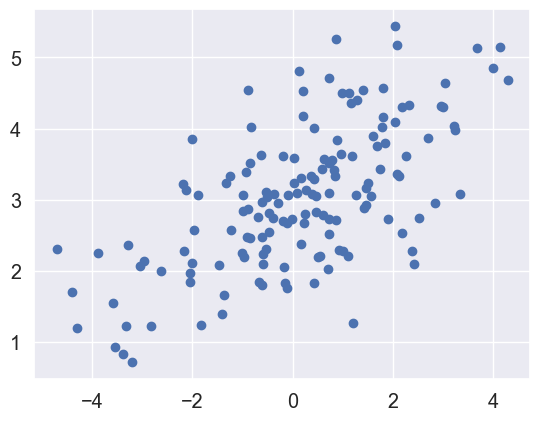

In [41]:
plt.scatter(X[:, 0], X[:, 1])

Let's create an object of the PCA class.

By the way, what would be a sensible number of components for PCA in our case?

In [42]:
pca = PCA(n_components=1)

Let's train and transform our matrix X using the `fit_transform` method.

In [43]:
Y = pca.fit_transform(X)

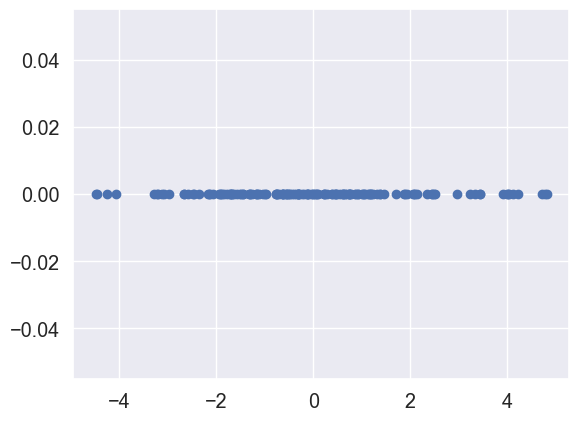

In [44]:
plt.scatter(Y, np.zeros(Y.shape))

Let's transform our data back to its original size using the `inverse_transform` method.

By the way, please comment on how this method works, based on what we discussed about SVD.

Understanding the operation of the inverse transformation can be explained as follows: if SVD returns `U`, `S`, `V`, where `U @ S` represents the PCA transformation, then multiplying by `V` as well will essentially be the inverse transformation.

In [45]:
X_hat = pca.inverse_transform(Y)

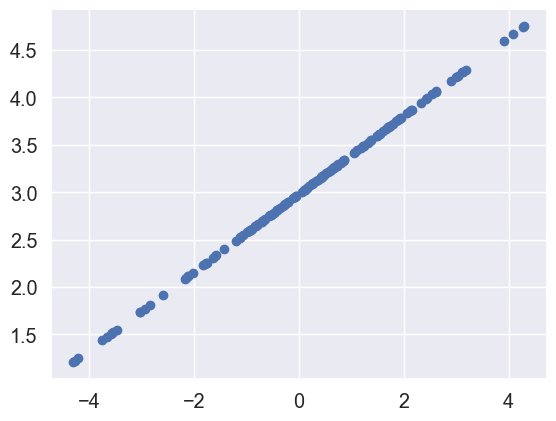

In [46]:
plt.scatter(X_hat[:, 0], X_hat[:, 1])

Question: What are the current dimensions of the matrices `X`, `Y`, and `X_hat`?

In [47]:
print(X.shape)
print(Y.shape)
print(X_hat.shape)

(150, 2)
(150, 1)
(150, 2)


Let's examine the principal components (specifically, one component) using the `components_` variable.

In [48]:
pca.components_

array([[-0.92451685, -0.38114117]])

Let's construct the following graphs:
* On the first graph, the original points are marked in blue, and the same points, after projection and inverse transformation, are marked in red.

* The second graph will display points that are projected onto the principal component in one-dimensional space. In other words, it shows the distribution of points along the principal component.

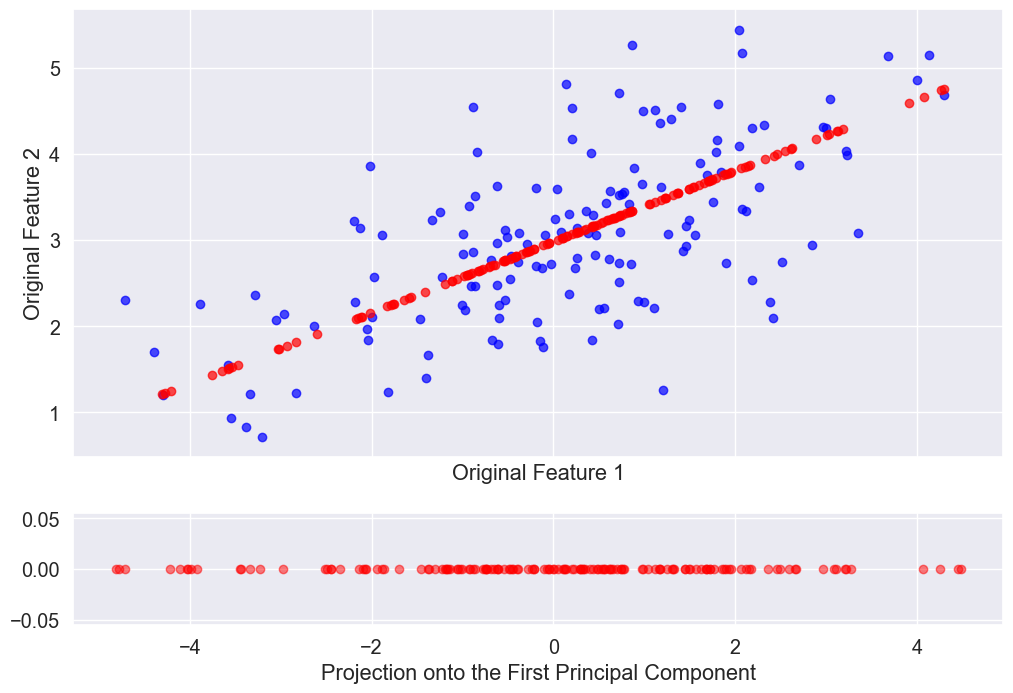

In [49]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Plot the points, using the first column of matrix X as x-axis coordinates
# and the second column as y-axis coordinates
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color='blue')
# Similarly, for the transformed matrix X_hat
axes[0].scatter(X_hat[:, 0], X_hat[:, 1], color='red', alpha=0.7)

axes[0].set_xlabel('Original Feature 1')
axes[0].set_ylabel('Original Feature 2')

# Plot the distribution of points along the principal component, using the vector -Y as x-axis coordinates
# and zeros as y-axis coordinates
axes[1].scatter(-Y, np.zeros(len(Y)), alpha=0.5, color='red')

axes[1].set_xlabel('Projection onto the First Principal Component')

plt.show()


#### Question

Why did we plot the vector `-Y` instead of `Y` in our case?

Hint—look at the principal component!

**Other Dimensionality Reduction Methods:**

- http://scikit-learn.org/stable/modules/manifold.html#manifold

**Examples with Visualization:**

- http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

- http://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py

## Section 4. Image Compression Using PCA

Download an Image

In [50]:
! wget https://www.dropbox.com/s/ehhrw5l46rpnv61/3840x2400.png

--2026-01-08 13:57:55--  https://www.dropbox.com/s/ehhrw5l46rpnv61/3840x2400.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/nv6xlsd6m7jatkaje52yl/3840x2400.png?rlkey=jaq1zzkqpl2053cen752j3oou [following]
--2026-01-08 13:57:55--  https://www.dropbox.com/scl/fi/nv6xlsd6m7jatkaje52yl/3840x2400.png?rlkey=jaq1zzkqpl2053cen752j3oou
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc744122cd39e89bfc821a8ebb15.dl.dropboxusercontent.com/cd/0/inline/C4kAimioLvSJwJMMnN1vALahYeE3wGzGwbHSDdKjaEOS1iaJTNvpEYg3vgHkQbos5NYk3s19JzPDtJJTI9VOXrZZE01mroAh7IOA36QtcTAqjCEApJbR_p_mclLM65wtIK87s7NCPDpM8vTmRTeSUkHJ/file# [following]
--2026-01-08 13:57:56--  https://uc744122cd39e89bfc821a8ebb15.dl.dropboxusercontent.com/cd/0/inline/C4kAimioLvSJwJMMnN1vALah

**Read the Image**
Use the `imread` function from the `matplotlib` library to load the image (remember this function—it will be useful later!).


In [51]:
image = plt.imread('3840x2400.png')

**Check the Image Size**


In [52]:
image.shape

(2400, 3840, 3)

**Why are the Dimensions Like This?**
We'll discuss what each dimension represents and why the image has that particular size.

**Understanding the Image**

Here's what the image looks like as data:

In [53]:
image[1600, 1000]

array([0.39215687, 0.10980392, 0.11372549], dtype=float32)

**Plot the Image**
Finally, we'll use the `imshow` function from the `matplotlib` library to display the image (also an important function to remember).

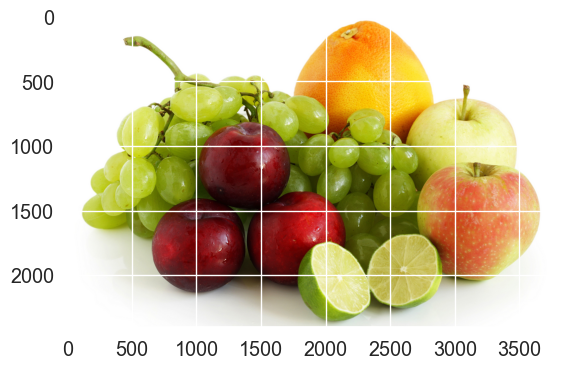

In [54]:
plt.imshow(image)

Alright, so what should we do now?

Let's divide our image into 24 equal pieces (cutting the image into equal parts).

We'll apply transformations to the image to extract 24 blocks of size 600x640, turning an array of size `(2400, 3840, 3)` into an array of size `(24, 600, 640, 3)`. We do all this so that later each piece can be stretched into one vector and ultimately get an array of size `(24, 600 * 640 * 3)`.

To implement such a transformation, we will use simple logic: if we want to divide a dimension (for example, turn 2400 into 4 and 600), then we need to move it to the end; on the contrary, if we want to combine two dimensions (for example, turn 4 and 600 into 2400), then we also need to move both to the end and set them one after the other.

In carrying out our plan, we will need two functions:
* To move dimensions, use the `transpose(<position to move the zeroth dimension>, <position to move the first dimension>, etc.)` method;
* To concatenate and split dimensions, use the `reshape(<new size>)` method.

Below is a step-by-step application of these functions to our picture.

Original image dimension:

In [55]:
image.shape

(2400, 3840, 3)

Dimension after permuting the zero axis to the first position, the first to the second, and the second to the zero:

In [56]:
image.transpose((1, 2, 0))\
    .shape

(3840, 3, 2400)

We divide the height and check the dimension:

In [57]:
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .shape

(3840, 3, 4, 600)

We rearrange the dimensions to divide the width and check the dimension:

In [58]:
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .shape

(3, 4, 600, 3840)

We divide the width and check the dimension:

In [59]:
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .reshape((3, 4, 600, 6, 640))\
    .shape

(3, 4, 600, 6, 640)

We rearrange the dimensions to then "collapse" them:

In [60]:
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .reshape((3, 4, 600, 6, 640))\
    .transpose((1, 3, 2, 4, 0))\
    .shape

(4, 6, 600, 640, 3)

And finally, we concatenate the dimensions to get 24 rows:

In [61]:
image.transpose((1, 2, 0))\
    .reshape((3840, 3, 4, 600))\
    .transpose((1, 2, 3, 0))\
    .reshape((3, 4, 600, 6, 640))\
    .transpose((1, 3, 2, 4, 0))\
    .reshape((4 * 6, 600 * 640 * 3))\
    .shape

(24, 1152000)

Hooray, we managed to handle this quite complex task! Let's now put everything together.

In [62]:
X = image.transpose((1, 2, 0))\
         .reshape((3840, 3, 4, 600)) \
         .transpose((1, 2, 3, 0))\
         .reshape((3, 4, 600, 6, 640)) \
         .transpose((1, 3, 2, 4, 0))\
         .reshape((4 * 6, 600 * 640 * 3))
print(X.shape)

(24, 1152000)


In fact, we have obtained a sort of object-feature matrix for our image. If you think about it, the object for a picture is its piece, and the features are some representation of each piece. This is exactly the structure that our final matrix X represents!

Now, let's visualize the resulting blocks to ensure that we haven't made any mistakes—if we end up with a coherent picture, it will mean that everything has been done absolutely correctly!

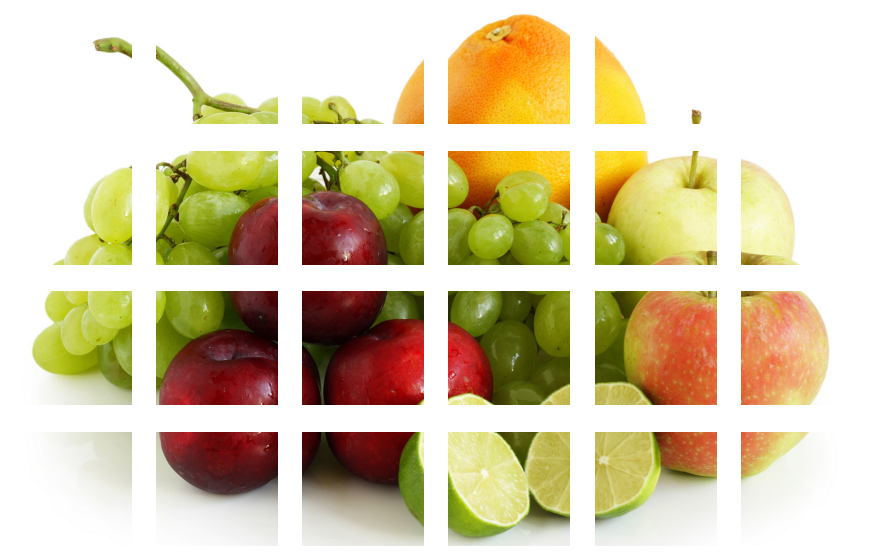

In [63]:
plt.figure(figsize=(11, 7))
for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.imshow(X[i].reshape((600, 640, 3)))
    plt.axis('off');

Clearly, everything has been done correctly. Well done to us!

Now that we've learned how to properly transform the image into blocks (by the way, why did we do this again?), let's move on to the main part—applying PCA to the data.

Let's use the following functions to explore how choosing the number of principal components affects the quality of the image. Remember, we can choose the number of components we want to keep (thereby truncating the matrices in the SVD decomposition), and then return to the original dimensions by simply multiplying everything by the truncated third SVD matrix.

In [64]:
def draw_components(pca, n, m):
    """
    This function draws the principal components from a trained PCA model.

    pca - trained PCA model
    n - number of horizontal image blocks
    m - number of vertical image blocks
    """
    print('Average image')
    plt.figure(figsize=(1, 1))
    plt.imshow(pca.mean_.reshape((n, m, 3)), cmap='gray')
    plt.axis('off')
    plt.show()

    print('Principal components')
    plt.figure(figsize=(11, len(pca.components_) // 10 + 1))
    for i, comp in enumerate(pca.components_):
        plt.subplot(len(pca.components_) // 10 + 1, 10, i + 1)
        img = pca.components_[i].reshape((n, m, 3))
        plt.imshow((img - img.min()) / (img.max() - img.min()), cmap='gray')
        plt.axis('off')
    plt.show()


def image_pca(image, n, m, n_components=20, draw_picture=True,
              draw_comp=True, visualization=True):
    """
    This function compresses an image according to a specified number of principal components, then
    returns it to its original form and displays the result.

    image - original picture
    n - number of horizontal image blocks
    m - number of vertical image blocks
    n_components - number of principal components
    draw_picture - whether to show the original picture
    draw_comp - whether to draw the principal components
    visualization - whether to draw the projection onto the first three components
    """

    # Display the original picture
    if draw_picture:
        plt.figure(figsize=(15, 7))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    print("Dimension of the original image: ", image.shape)

    # Dividing into blocks
    N, M, K = image.shape
    X = image.transpose((1, 2, 0))\
             .reshape((M, K, N // n, n)) \
             .transpose((1, 2, 3, 0))\
             .reshape((K, N // n, n, M // m, m)) \
             .transpose((1, 3, 2, 4, 0))\
             .reshape((N * M // (n * m), n * m * K))

    # Applying PCA
    pca = PCA(n_components=n_components)
    Y = pca.fit_transform(X)
    X_hat = pca.inverse_transform(Y)

    # Adjusting color intensity
    max_value = X.max()
    X_hat = X_hat * (X_hat <= max_value) + max_value * (X_hat > max_value)
    X_hat = X_hat * (X_hat >= 0)

    # Reassembling the image from blocks
    X_hat = X_hat.reshape((N // n, M // m, n, m, K)).transpose((1, 3, 4, 0, 2))\
                 .reshape((M // m, m, K, N)).transpose((3, 2, 0, 1))\
                 .reshape((N, K, M)).transpose((0, 2, 1))

    # Display the restored image
    plt.figure(figsize=(15, 7))
    plt.imshow(X_hat)
    plt.axis('off')
    plt.title('Restored image with {} principal components.\n'.format(n_components))
    plt.show()
    print("Dimension of the compressed image: ", X_hat.shape)

    # If needed, draw the principal components
    if draw_comp:
        draw_components(pca, n, m)

    # Visualizing the projection on the first three components (third - color)
    if visualization:
        pca = PCA(n_components=3)
        Y = pca.fit_transform(X)
        plt.figure(figsize=(15, 10))
        plt.scatter(Y[:, 0], Y[:, 1], c=Y[:, 2], alpha=0.1)
        plt.xlabel('Projection onto the first principal component')
        plt.ylabel('Projection onto the second principal component')
        plt.title('Projection onto the first three components (third - color)')
        plt.show()
    plt.imsave('im1.png', image)
    print("Size of the original file", os.path.getsize('im1.png'))
    print(image.size)

    plt.imsave('im2.png', X_hat)
    print(X_hat.size)
    print("Size of the compressed file", os.path.getsize('im2.png'))


So, let's use our function `image_pca` and divide the image into 12 sections horizontally and 16 sections vertically.

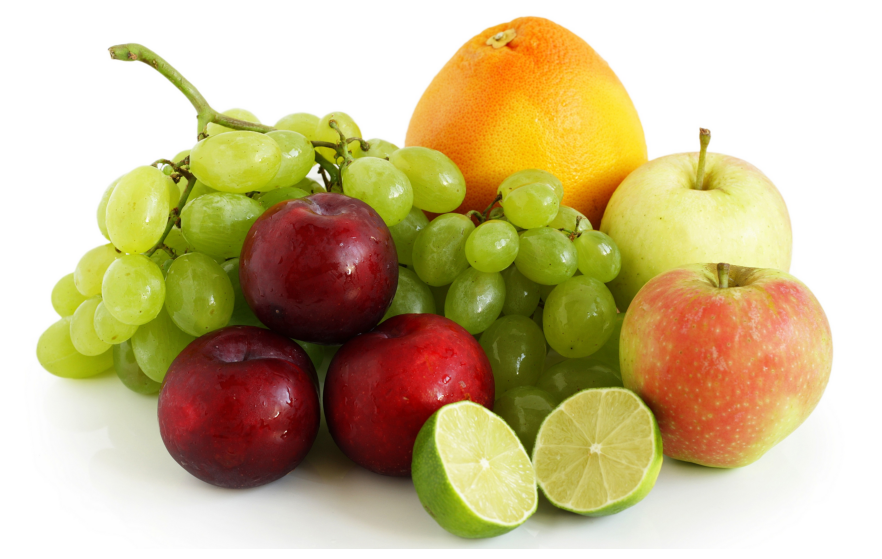

Dimension of the original image:  (2400, 3840, 3)


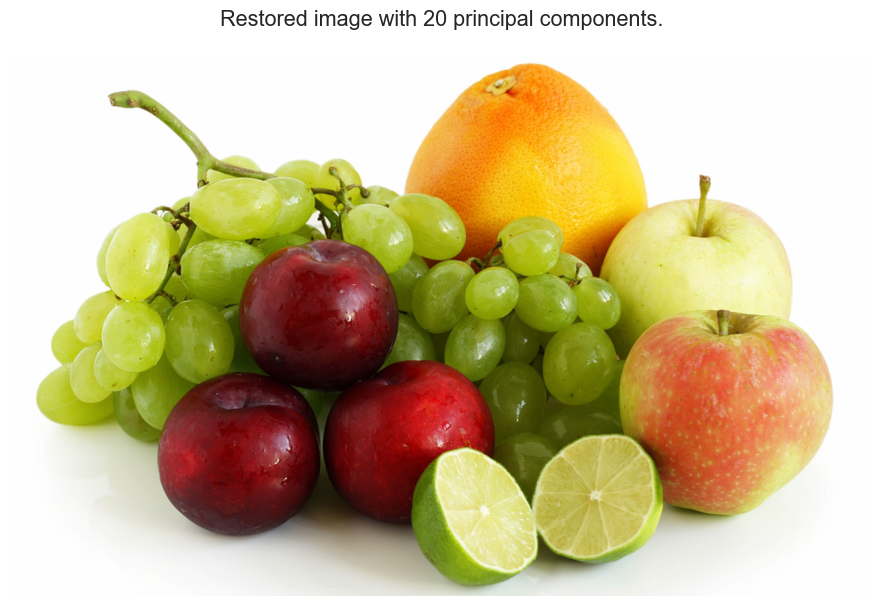

Dimension of the compressed image:  (2400, 3840, 3)
Average image


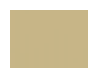

Principal components


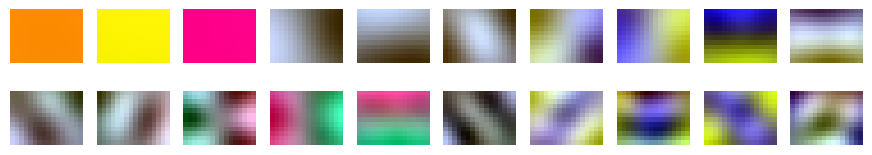

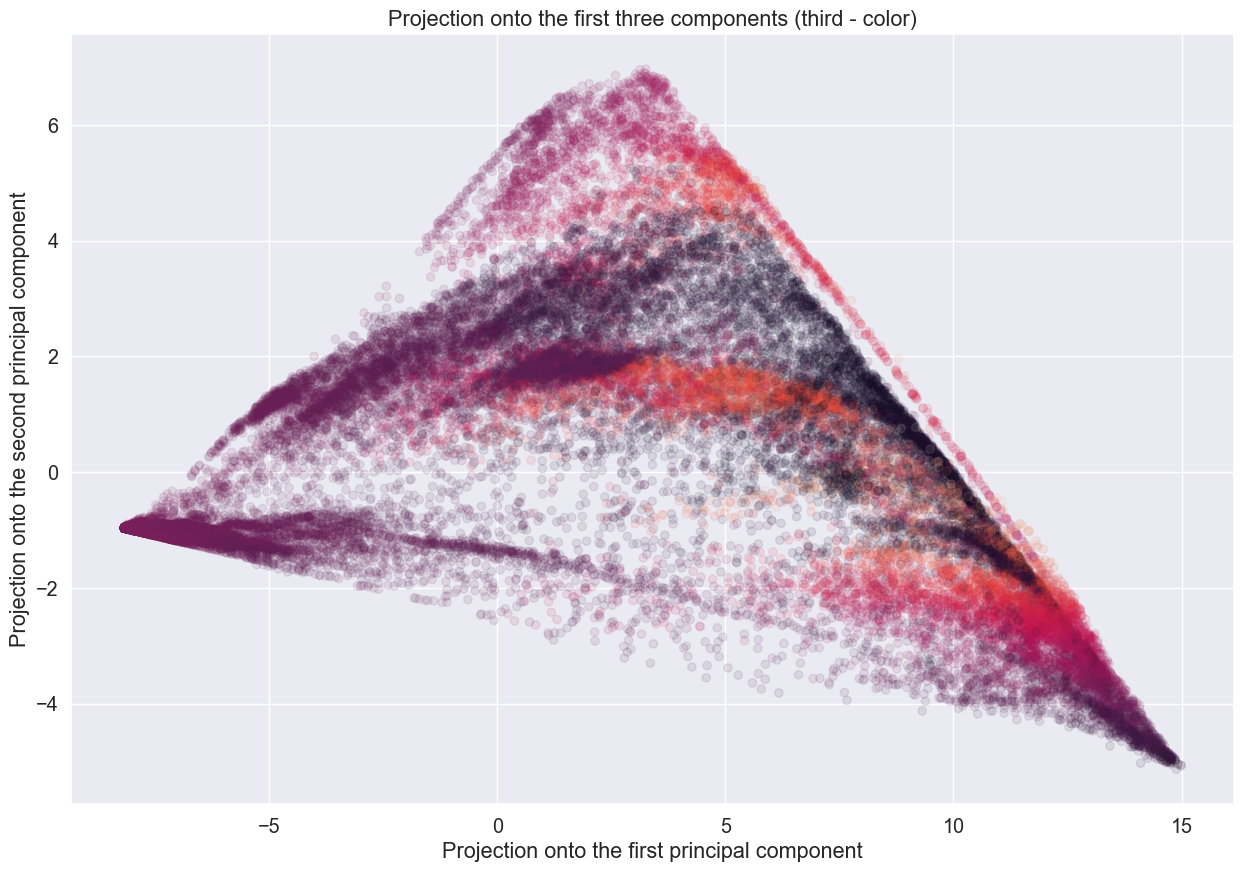

Size of the original file 8160906
27648000
27648000
Size of the compressed file 6447950


In [65]:
image_pca(image, 12, 16)

Not bad...

But now for the most interesting part—let’s see how the image changes depending on the number of components we choose.

Dimension of the original image:  (2400, 3840, 3)


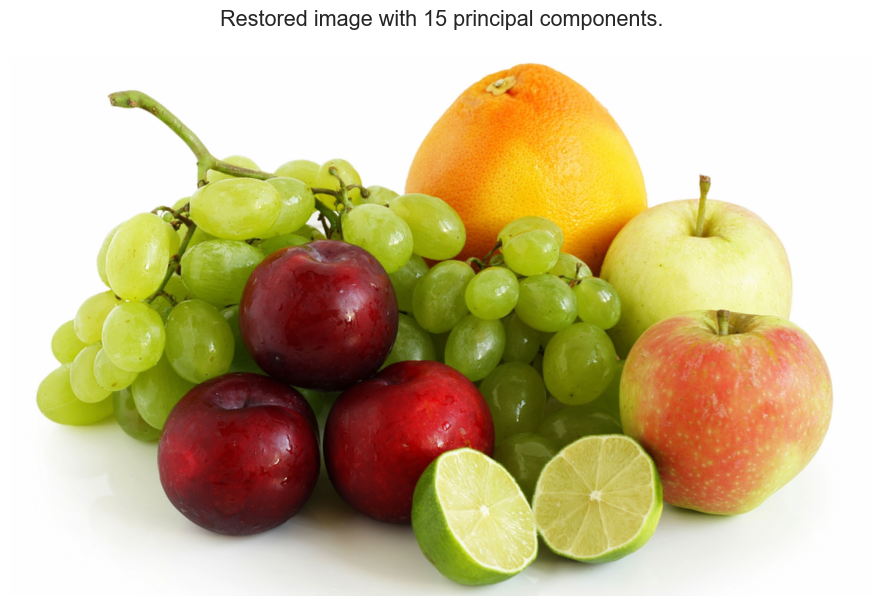

Dimension of the compressed image:  (2400, 3840, 3)
Size of the original file 8160906
27648000
27648000
Size of the compressed file 6064228
Dimension of the original image:  (2400, 3840, 3)


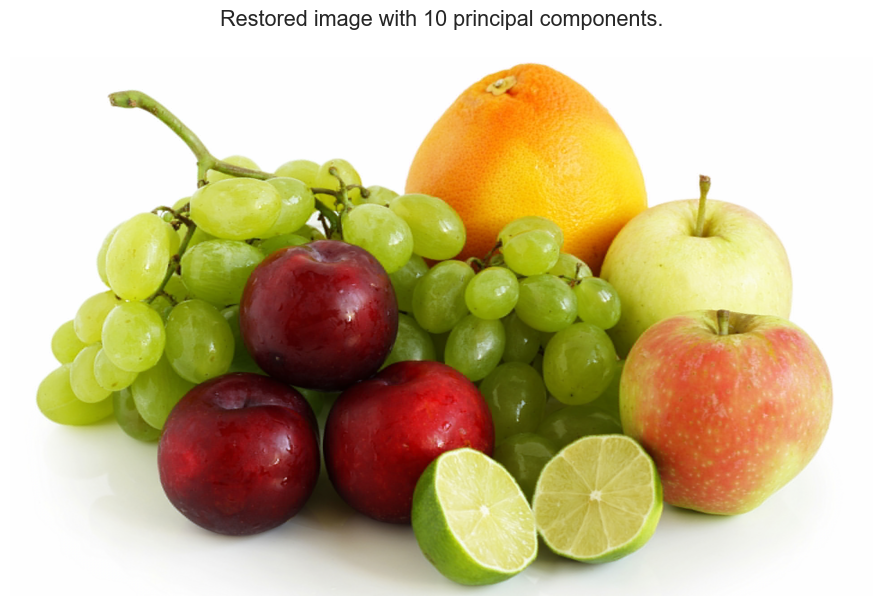

Dimension of the compressed image:  (2400, 3840, 3)
Size of the original file 8160906
27648000
27648000
Size of the compressed file 5461148
Dimension of the original image:  (2400, 3840, 3)


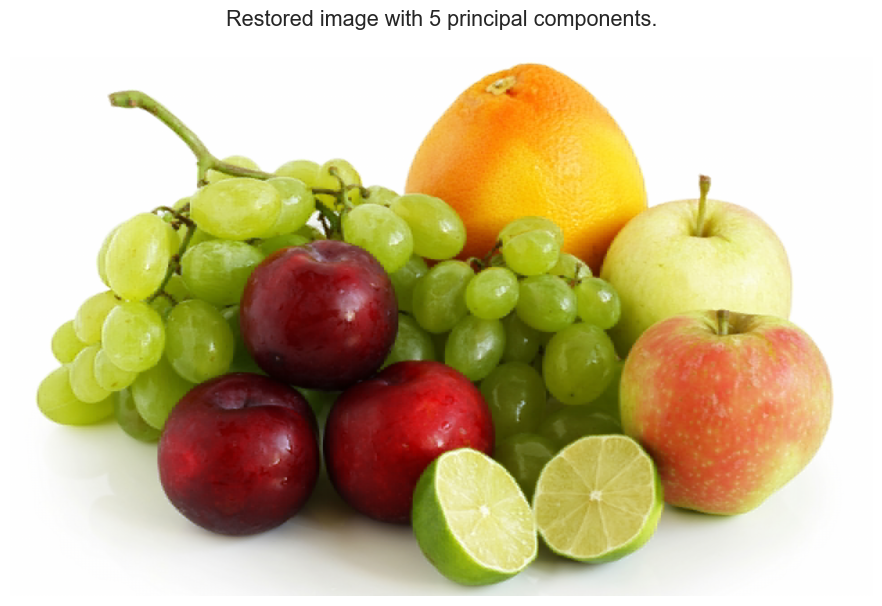

Dimension of the compressed image:  (2400, 3840, 3)
Size of the original file 8160906
27648000
27648000
Size of the compressed file 4460980
Dimension of the original image:  (2400, 3840, 3)


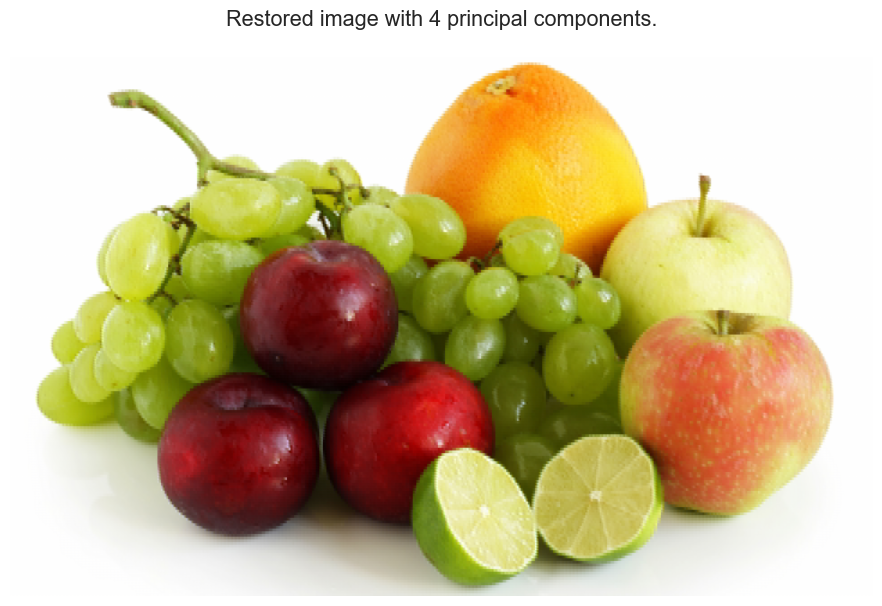

Dimension of the compressed image:  (2400, 3840, 3)
Size of the original file 8160906
27648000
27648000
Size of the compressed file 3334141
Dimension of the original image:  (2400, 3840, 3)


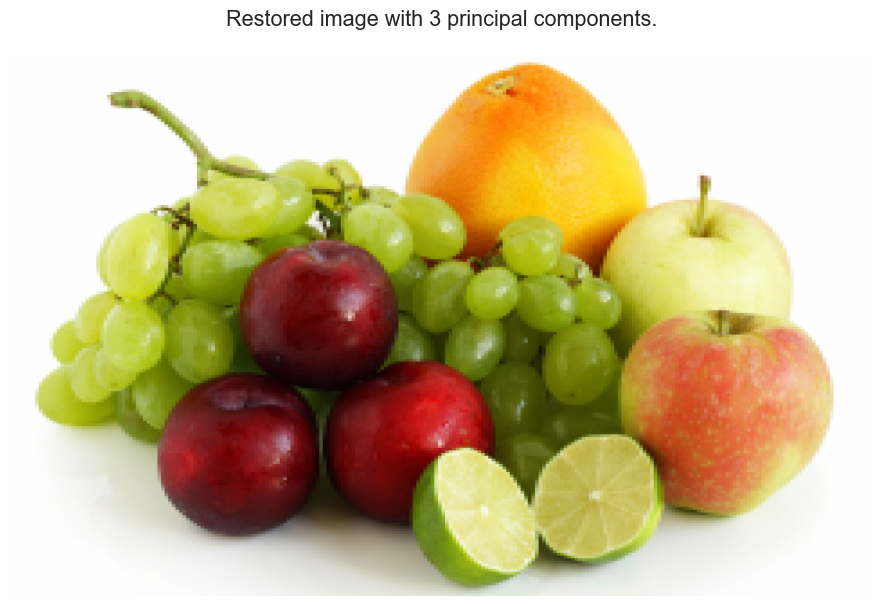

Dimension of the compressed image:  (2400, 3840, 3)
Size of the original file 8160906
27648000
27648000
Size of the compressed file 2120312
Dimension of the original image:  (2400, 3840, 3)


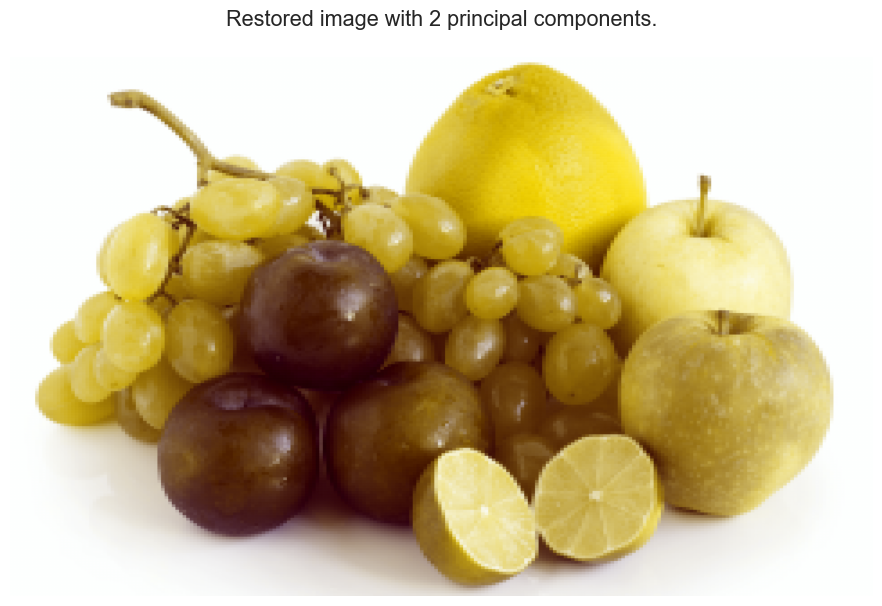

Dimension of the compressed image:  (2400, 3840, 3)
Size of the original file 8160906
27648000
27648000
Size of the compressed file 2009147
Dimension of the original image:  (2400, 3840, 3)


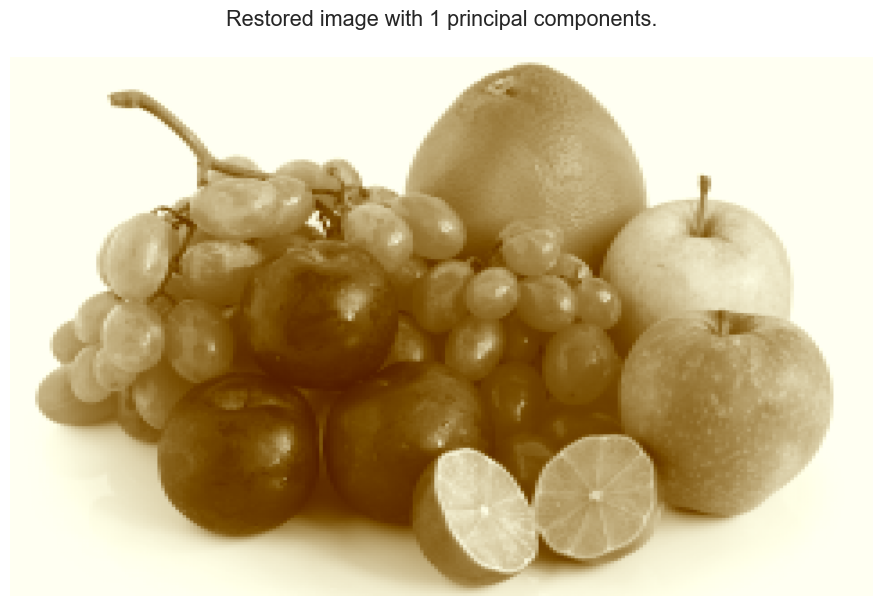

Dimension of the compressed image:  (2400, 3840, 3)
Size of the original file 8160906
27648000
27648000
Size of the compressed file 1079329


In [66]:
for n_components in [15, 10, 5, 4, 3, 2, 1]:
    image_pca(
        image, 12, 16,
        n_components=n_components,
        draw_picture=False,
        draw_comp=False,
        visualization=False
    )

It looks amazing! This is how you can use PCA for image compression.

But in fact, this can be done not only with images but also with sound and video—since all these data types can be represented as matrices. Therefore, all that is required is to correctly identify the objects and features from these matrices—after which PCA can be easily applied in the same way.

## Section 5. PCA for MNIST

However, we are interested in PCA primarily as a method for reducing data dimensionality, not as a data compression technique.

Therefore, it is proposed to use it to solve a classification problem on the MNIST dataset, which consists of images of hand-drawn digits. In this dataset, the target labels indicate which digit is drawn—essentially, this is a task of multiclass classification.

Let's download the training data:

In [67]:
! wget https://www.dropbox.com/s/gq1tj9bzj8dkcul/mnist_train.csv

--2026-01-08 13:59:16--  https://www.dropbox.com/s/gq1tj9bzj8dkcul/mnist_train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/hh6pv4b2xeqcx8maksrb6/mnist_train.csv?rlkey=d63eohid5ltm26c8jx2bhpxsg [following]
--2026-01-08 13:59:17--  https://www.dropbox.com/scl/fi/hh6pv4b2xeqcx8maksrb6/mnist_train.csv?rlkey=d63eohid5ltm26c8jx2bhpxsg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2e29b17ff8a6e44bb186977fce.dl.dropboxusercontent.com/cd/0/inline/C4mX2ALHHG7GzgZaiX6j1JsIWtPvECipTKdgM9JimRCV7USN6x660BGCSo2rJn6TFVU1hv7Xq0b0qiVM6UgOPdp3bkcyWspwMVzNEBiO8Htu9wtlifjJGPIzRyQ-QBmF0YncAhl1k9crlukazCNGYMj9/file# [following]
--2026-01-08 13:59:17--  https://uc2e29b17ff8a6e44bb186977fce.dl.dropboxusercontent.com/cd/0/inline/C4mX2ALHHG7GzgZaiX

In [68]:
mnist_data_all = pd.read_csv('mnist_train.csv')

Let's examine the data. What is the target, and in which column is it located?

In [ ]:
mnist_data_all.head(10)

Let's divide the data into features and labels:

In [ ]:
mnist_label = mnist_data_all['label']
mnist_data = mnist_data_all.drop(columns = ["label"])

Now, let's look at the size of the features:

In [ ]:
mnist_data.shape

Why exactly this number? How does it relate to the promised images?


Let's display the label of some element and plot it using the `imshow` function from the `matplotlib` library:

In [ ]:
plt.figure(figsize=(6,5))

idx = 4778

print("Label: ", mnist_label[idx])

# It's necessary to select an object, convert it to a numpy array, and then reshape it to the desired size.
grid_data = mnist_data.iloc[idx].to_numpy().reshape(28, 28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

In our dataset, each object is described by 784 features. How can we view the entire dataset at a glance?

PCA comes to help us!

Let's create a PCA object with the number of components set to 2.

In [ ]:
pca = PCA(n_components=2)

By the way, why did we specifically choose 2? This isn't random. What will this help us achieve?

Let's train the PCA on our features using the `fit` method:

In [ ]:
pca.fit(mnist_data)

Let's transform our dataset into 2D using the `transform` method:

In [ ]:
mnist_data_2D = pca.transform(mnist_data)

Let's look at the size of the resulting dataset:

In [ ]:
mnist_data_2D.shape

Now, let's do something meaningful with respect to our initial task: plot the points on a plane using the `scatter` function and assign colors to them according to their class, by passing in the argument `c=mnist_label`:

In [ ]:
plt.figure(figsize=(10,8))

plt.scatter(mnist_data_2D[:,0], mnist_data_2D[:,1], c=mnist_label)

plt.colorbar()
plt.show()

It's evident that the clusters are quite separable. Overall, it results an amazing visual!

#### Question

Why do we even need to reduce the number of features?

#### Explanation

We need to address the infamous problem known as the "curse of dimensionality." But what does this "curse" mean from the perspective of people who work with data?

High dimensionality leads to the following issues:

*   It requires a lot of memory.
*   Computations become labor-intensive.
*   All sample elements start to appear approximately at the same distance from each other!

We can demonstrate how a large number (often noisy) of features affects the performance of a machine learning algorithm. To do this, we will solve a classification problem using the MNIST dataset with PCA as the dimensionality reduction method.

Let's download the test data and repeat similar operations as for the train set:

In [ ]:
! wget https://www.dropbox.com/s/xuya93ez6ff712x/mnist_test.csv

In [ ]:
mnist_data_test_all = pd.read_csv('mnist_test.csv')

In [ ]:
mnist_label_test = mnist_data_test_all['label']
mnist_data_test = mnist_data_test_all.drop(columns = ["label"])

In [ ]:
mnist_data_test.shape

We will solve this problem using the k-nearest neighbors algorithm, which is already familiar to us, so let's import this algorithm from `sklearn`.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Now, let's use the following function—it takes a training dataset, a test dataset, and the number of components in PCA, transforms the data, trains the model, and returns the quality on the test dataset:

In [ ]:
def reduce_and_learn(X_train, y_train, X_test, y_test, dim=2):
    pca = PCA(n_components=dim)

    pca.fit(X_train)
    X_train_dim_D = pca.transform(X_train)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_dim_D, y_train)

    X_test_dim_D = pca.transform(X_test)

    predict_quality = knn.score(X_test_dim_D, y_test)
    return predict_quality

In a loop over the number of components, we run our function `reduce_and_learn` and store the quality in the array `predicts_quality`.

In [ ]:
from tqdm import tqdm

dims = [2, 5, 10, 20, 40, 80, 160, 320, 640, 784]
predicts_quality = []

for dim in tqdm(dims):
    predicts_quality.append(reduce_and_learn(mnist_data, mnist_label, mnist_data_test, mnist_label_test, dim=dim))

Now, using the array we obtained, let's plot the dependency of quality on the number of components in PCA:

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(dims, predicts_quality)

plt.rc('font', size=12)
plt.xlabel('Dimensionality')
plt.ylabel('Quality')
plt.grid()
plt.show()

Let's output the number of components where the quality is maximized, as well as the value of the quality itself.

In [ ]:
print(f"Best quality at {dims[np.argmax(predicts_quality)]} components")
print(f"Maximum quality = {max(predicts_quality)}")

We achieved a modest increase (though still an increase), but even this can reduce the company's losses by millions. Additionally, other algorithms may show a greater difference in quality, and such experiments are suggested to the audience as exercises.

You might also have noticed the difference in the speed of the algorithms depending on the number of features. Often, the speed of operation is one of the most important criteria for choosing an algorithm.